In [7]:
import warnings
warnings.filterwarnings("ignore")
import re
import time
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from util3 import *

In [ ]:
start_time = time.time()

## Load Files

In [2]:
df_train = pd.read_csv('./data/train.csv', encoding='ISO-8859-1')
df_test = pd.read_csv('./data/test.csv', encoding='ISO-8859-1')
df_pro_desc = pd.read_csv('./data/product_descriptions.csv')
df_attr = pd.read_csv('./data/attributes.csv')

df_brand = df_attr[df_attr.name == 'MFG Brand Name'][['product_uid', 'value']].rename(columns={'value': 'brand'})
df['brand'].fillna('NOBRAND', inplace=True)
num_train = df_train.shape[0]

df = pd.concat((df_train, df_test), axis=0, ignore_index=True)
df = pd.merge(df, df_pro_desc, how='left', on='product_uid')
df = pd.merge(df, df_brand, how='left', on='product_uid')

## Fix Typos

In [3]:
df['search_term'] = df['search_term'].map(correct_typo)

## Stemming & Tokenizing

In [8]:
df['search_term_stemmed'] = df['search_term'].map(lambda x: str_stem(x))
df['product_title_stemmed'] = df['product_title'].map(lambda x: str_stem(x))
df['product_description_stemmed'] = df['product_description'].map(lambda x: str_stem(x))
df['brand_stemmed'] = df['brand'].map(lambda x: str_stem(x))

NameError: name 'str_stem' is not defined

In [9]:
df['tokens_search_term'] = df['search_term'].map(lambda x: word_tokenize(x))
df['tokens_product_title'] = df['product_title'].map(lambda x: word_tokenize(x))
df['tokens_product_description'] = df['product_description'].map(lambda x: word_tokenize(x))
df['tokens_brand'] = df['brand'].map(lambda x: word_tokenize(x))

In [11]:
df['tokens_search_term_stemmed'] = df['search_term_stemmed'].map(lambda x: word_tokenize(x))
df['tokens_product_title_stemmed'] = df['product_title_stemmed'].map(lambda x: word_tokenize(x))
df['tokens_product_description_stemmed'] = df['product_description_stemmed'].map(lambda x: word_tokenize(x))
df['tokens_brand_stemmed'] = df['brand_stemmed'].map(lambda x: word_tokenize(x))

KeyError: 'product_tile_stemmed'

In [14]:
df.to_csv('./df_aftering_stemming_and_tokenizing.csv')

## Meta-Features

### Length

In [15]:
df['len_search_term'] = df['tokens_search_term'].map(lambda x: len(x))
df['len_product_title'] = df['tokens_product_title'].map(lambda x: len(x))
df['len_product_description'] = df['tokens_product_description'].map(lambda x: len(x))
df['len_brand'] = df['tokens_brand'].map(lambda x: len(x))

In [61]:
df['len_search_term_stemmed'] = df['tokens_search_term_stemmed'].map(lambda x: len(x))
df['len_product_title_stemmed'] = df['tokens_product_title_stemmed'].map(lambda x: len(x))
df['len_product_description_stemmed'] = df['tokens_product_description_stemmed'].map(lambda x: len(x))
df['len_brand_stemmed'] = df['tokens_brand_stemmed'].map(lambda x: len(x))

### Flag & Count & Ratio

In [17]:
df['flag_search_term_in_product_title'] = df.apply(lambda x: int(x['search_term'] in x['product_title']), axis=1)
df['flag_search_term_in_product_description'] = df.apply(lambda x: int(x['search_term'] in x['product_description']), axis=1)
df['flag_search_term_in_brand'] = df.apply(lambda x: int(x['search_term'] in x['brand']), axis=1)

In [42]:
df['flag_search_term_in_product_title_stemmed'] = \
    df.apply(lambda x: int(x['search_term_stemmed'] in x['product_title_stemmed']), axis=1)
df['flag_search_term_in_product_description_stemmed'] = \
    df.apply(lambda x: int(x['search_term_stemmed'] in x['product_description_stemmed']), axis=1)
df['flag_search_term_in_brand_stemmed'] \
        = df.apply(lambda x: int(x['search_term'] in x['brand_stemmed']), axis=1)

In [55]:
df['num_search_term_in_product_title'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_product_title']))), axis=1)
df['num_search_term_in_product_description'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_product_description']))), axis=1)
df['num_search_term_in_brand'] = \
    df.apply(lambda x: len(set(x['tokens_search_term']).intersection(set(x['tokens_brand']))), axis=1)

In [57]:
df['num_search_term_in_product_title_stemmed'] = \
    df.apply(lambda x: len(set(x['tokens_search_term_stemmed']).intersection(set(x['tokens_product_title_stemmed']))), axis=1)
df['num_search_term_in_product_description_stemmed'] = \
    df.apply(lambda x: len(set(x['tokens_search_term_stemmed']).intersection(set(x['tokens_product_description_stemmed']))), axis=1)
df['num_search_term_in_brand_stemmed'] = \
    df.apply(lambda x: len(set(x['tokens_search_term_stemmed']).intersection(set(x['tokens_brand_stemmed']))), axis=1)

In [60]:
df['ratio_search_term_in_product_title'] = \
    df.apply(lambda x: x['num_search_term_in_product_title'] / float(x['len_search_term']), axis=1)
df['ratio_search_term_in_product_description'] = \
    df.apply(lambda x: x['num_search_term_in_product_description'] / float(x['len_search_term']), axis=1)
df['ratio_search_term_in_brand'] = \
    df.apply(lambda x: x['num_search_term_in_brand'] / float(x['len_search_term']), axis=1)

In [62]:
df['ratio_search_term_in_product_title_stemmed'] = \
    df.apply(lambda x: x['num_search_term_in_product_title_stemmed'] / float(x['len_search_term_stemmed']), axis=1)
df['ratio_search_term_in_product_description_stemmed'] = \
    df.apply(lambda x: x['num_search_term_in_product_description_stemmed'] / float(x['len_search_term_stemmed']), axis=1)
df['ratio_search_term_in_brand_stemmed'] = \
    df.apply(lambda x: x['num_search_term_in_brand_stemmed'] / float(x['len_search_term_stemmed']), axis=1)

### Encode Brand Feature

In [73]:
brands = pd.unique(df.brand.ravel())
brand_encoder = {}
index = 1000
for brand in brands:
    brand_encoder[brand] = index
    index += 10
brand_encoder['NOBRAND'] = 0

In [75]:
df['brand_encoded'] = df['brand'].map(lambda x: brand_encoder[x])

## Text Similarities

### Jaccard

In [20]:
def jaccard(A, B):
    C = A.intersection(B)
    return float(len(C)) / (len(A) + len(B) - len(C))

In [24]:
df['sim_jaccard_search_term_to_product_title'] = df.apply(lambda x: jaccard(set(x['tokens_search_term']), set(x['tokens_product_title'])), axis=1)

In [26]:
df['sim_jaccard_search_term_to_product_title_stemmed'] = df.apply(lambda x: jaccard(set(x['tokens_search_term_stemmed']), set(x['tokens_product_title_stemmed'])), axis=1)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

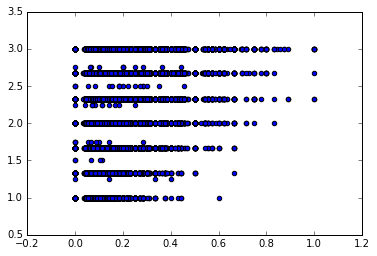

In [35]:
plt.scatter(df['sim_jaccard_search_term_to_product_title_stemmed'], df['relevance'])

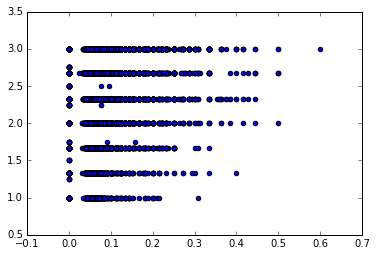

In [34]:
plt.scatter(df['sim_jaccard_search_term_to_product_title'], df['relevance'])

In [37]:
df['sim_jaccard_search_term_to_product_description'] = df.apply(lambda x: jaccard(set(x['search_term']), set(x['product_description'])), axis=1)

## Export

In [103]:
lev = pd.read_csv('df_final_lev_dist_more.csv', encoding='ISO-8859-1')

In [116]:
cols_to_drop_lev = list(filter(lambda x: not x.startswith('lev'), lev.columns.tolist()))

In [117]:
lev.drop(cols_to_drop_lev, axis=1, inplace=True)

In [119]:
for x in lev.columns.tolist():
    df[x] = lev[x]

In [121]:
cols_to_drop = list(filter(lambda x: x.startswith('tokens'), df.columns.tolist()))

In [125]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [133]:
df.drop(['id', 'product_uid', 'relevance',
                       'search_term', 'search_term_stemmed',
                       'product_title', 'product_title_stemmed',
                       'product_description', 'product_description_stemmed',
                       'brand', 'brand_stemmed'
                       ], axis=1).head()

,len_search_term,len_product_title,len_product_description,flag_search_term_in_product_title,flag_search_term_in_product_description,sim_jaccard_search_term_to_product_title,sim_jaccard_search_term_to_product_title_stemmed,sim_jaccard_search_term_to_product_description,flag_search_term_in_product_title_stemmed,flag_search_term_in_product_description_stemmed,...,num_search_term_in_brand,num_search_term_in_brand_stemmed,ratio_search_term_in_brand,ratio_search_term_in_brand_stemmed,lev_dist_to_product_title_min,lev_dist_to_product_title_max,lev_dist_to_product_title_sum,lev_dist_to_product_description_min,lev_dist_to_product_description_max,lev_dist_to_product_description_sum
0,2,4,148,0,0,0,0.142857,0.207547,0,0,...,0,0,0,0,3,7,63,3,16,321
1,2,4,148,0,0,0,0.000000,0.169811,0,0,...,0,0,0,0,3,7,67,3,18,337
2,2,13,196,0,0,0,0.000000,0.140351,0,0,...,0,0,0,0,2,7,120,2,18,337
3,3,15,116,0,0,0,0.055556,0.189655,0,0,...,0,0,0,0,2,9,197,3,14,428
4,3,15,116,0,0,0,0.187500,0.258621,1,0,...,0,0,0,0,3,8,206,3,14,440


In [ ]:
df.to_csv('./df_start_over.csv')

In [124]:
df.columns.tolist()

['id',
 'product_title',
 'product_uid',
 'relevance',
 'search_term',
 'product_description',
 'brand',
 'search_term_stemmed',
 'product_title_stemmed',
 'product_description_stemmed',
 'tokens_search_term',
 'tokens_product_title',
 'tokens_product_description',
 'tokens_search_term_stemmed',
 'tokens_product_title_stemmed',
 'tokens_product_description_stemmed',
 'len_search_term',
 'len_product_title',
 'len_product_description',
 'flag_search_term_in_product_title',
 'flag_search_term_in_product_description',
 'sim_jaccard_search_term_to_product_title',
 'sim_jaccard_search_term_to_product_title_stemmed',
 'sim_jaccard_search_term_to_product_description',
 'flag_search_term_in_product_title_stemmed',
 'flag_search_term_in_product_description_stemmed',
 'num_search_term_in_product_title',
 'num_search_term_in_product_description',
 'num_search_term_in_product_title_stemmed',
 'num_search_term_in_product_description_stemmed',
 'ratio_search_term_in_product_title',
 'ratio_search_te